## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('float_format', '{:,.2f}'.format)

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
title — название фильма;  
puNumber — номер прокатного удостоверения;  
show_start_date — дата премьеры фильма;  
type — тип фильма;  
film_studio — студия-производитель;  
production_country — страна-производитель;  
director — режиссёр;  
producer — продюсер;  
age_restriction — возрастная категория;  
refundable_support — объём возвратных средств государственной поддержки;  
nonrefundable_support — объём невозвратных средств государственной поддержки;  
financing_source — источник государственного финансирования;  
budget — общий бюджет фильма;  
ratings — рейтинг фильма на КиноПоиске;  
genres — жанр фильма.

In [5]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.  
puNumber — номер прокатного удостоверения;  
box_office — сборы в рублях.

Для того, чтобы "склеить" таблицы, необходимо привести столбец 'puNumber' к единому типу.

In [6]:
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')

In [7]:
data = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how = 'left')

Проверяем кол-во строк в получившейся таблице

In [8]:
len(data)

7486

In [9]:
mkrf_shows['box_office'].count() == data['box_office'].count()

True

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,7486,6772,День святого Валентина_,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puNumber,7486,7484,221054410,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
show_start_date,7486,1965,2010-12-17T12:00:00.000Z,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7486,8,Художественный,4520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
film_studio,7468,5490,"Киностудия ""Мосфильм""",341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_country,7484,950,США,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,7477,4811,О.Семёнова,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
producer,6918,5349,П.Смирнов,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_restriction,7486,5,«16+» - для детей старше 16 лет,2851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
refundable_support,332.00,NaN,NaN,NaN,"11,864,457.83","24,916,555.26",0.00,0.00,0.00,"15,000,000.00","180,000,000.00"


Переводим столбец 'show_start_date' в формат даты

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')

Перевожу столбец 'ratings' в числовой формат, привожу данные рейтингов к единому виду. Из процентов в долю десяти.

In [13]:
data['ratings'] = data['ratings'].str.replace('%','').astype('float')

In [15]:
len(data.loc[data['ratings'] > 10])

29

In [16]:
data.loc[(data['ratings'] > 10), 'ratings'] = np.nan

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
for column in data.columns:
    print(column, data[column].isna().mean())

title 0.0
puNumber 0.0
show_start_date 0.0
type 0.0
film_studio 0.0024044883783061713
production_country 0.0002671653753673524
director 0.0012022441891530857
producer 0.07587496660432808
age_restriction 0.0
refundable_support 0.9556505476890195
nonrefundable_support 0.9556505476890195
budget 0.9556505476890195
financing_source 0.9556505476890195
ratings 0.13304835693294148
genres 0.13037670317926797
box_office 0.5781458722949506


В столбцах 'film_studio', 'director' и 'genres' незаполненных строк меньше 1%. Для того чтобы в дальнейшем было удобнее использовать информацию из столбцов, заполняю пропуски отбивкой unknowen

In [18]:
data['director'] = data['director'].fillna('Unknowen')

In [19]:
data['film_studio'] = data['film_studio'].fillna('Unknowen')

In [20]:
data['genres'] = data['genres'].fillna('Unknowen')

В столбце 'production_country' всего два пропуска. И оба приходятся на серийные произведения. Если у остальных выпусков страна производства одинаковая, можно заполнить NaN аналогичными значениями

In [21]:
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Unknowen,NaN,Unknowen,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [22]:
data[data['title'].str.contains('Детский юмористический киножурнал "Ералаш"', case=False)]['production_country'].unique()

array(['Россия'], dtype=object)

У аналогичных выпусков страна производства - Роccия. Заполняю пропуск этим значением.

In [23]:
data.loc[3186, 'production_country'] = 'Россия'

In [24]:
data[data['title'].str.contains('Мульт личности', case=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Unknowen,NaN,Unknowen,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Интуиция и интернет, конечно, подсказывает, что Мульт Личности тоже Россия.

In [25]:
data.loc[4441, 'production_country'] = 'Россия'

Пропусков в столбце 'producer' чуть больше 7%. Данные можно заполнить отбивкой 'Unknowen'

In [26]:
data['producer'] = data['producer'].fillna('Unknowen')

В столбце 'ratings' более 12% пропусков. Для того чтобы не влиять на среднюю оценку и не менять тип данных, оставляю пропуски.

In [27]:
data['ratings'].isnull().sum()

996

Пропусков в столбцах 'refundable_support', 'nonrefundable_support' и 'budget' более 95%. Для 'box_office' - этот процент чуть ниже 57% 
Для столбцов 'refundable_support' и 'nonrefundable_support' пропуски могут означать как отсутствие государственной поддержки, так и отсутствие информации об объёме вложенных средств. Пропуски в столбце 'budget' и 'box_office' вероятно также связаны с отсутствием информции. Восстановить такое кол-во значений медианами по имеющимся 5% информации невозможно. Заполнить значения строковыми (типа unknowen) - поменяет тип столбца и не даст возможность использовать его в расчётах. Заполнить нулями или отрицательными значениями - исказит данные при обработке, либо усложнит подсчёт, так как нужно будет постоянно исключать их из выборки. Так же в таблице присутствуют дубликаты, связанные с тем, что на фильм может быть выдано несколько прокатных лицензий. То есть строк у фильма может быть несколько, но значение гос.поддержки и бюджета может быть только одно. Указанные столбцы могут быть заполненны для конкртеной лицензии, а дублирование информации исказит данные при анализе. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [28]:
data.duplicated().sum()

0

In [29]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


Как будто бы нет дубликатов. Есть повторяющиеся значения (около 9%) по названию фильмов, но это связано с тем, что на один фильм может быть выдано несколько прокатных удостверений.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [30]:
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Дубликаты в столбце 'type' вероятно связаны с опечаткой при заполнении данных. Заменяю эти значения.

In [32]:
data['type'] = data['type'].str.strip()

In [33]:
data['puNumber'].value_counts()

221054410    2
221154310    2
112025418    1
121008316    1
114001410    1
            ..
224021210    1
221097110    1
124000512    1
121023816    1
121028517    1
Name: puNumber, Length: 7484, dtype: int64

Две прокатные лицензии дважды встречаются в данных.

In [34]:
data[(data['puNumber'] == '221054410') | (data['puNumber'] == '221154310')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Фильмы разные. На сколько я понимаю, эта ситуация нестандартная, так как одно прокатное удостверение не может быть выдано на два разных фильма. Удаляю эти строки.

In [35]:
data.drop(labels = [4638, 4639, 5067, 5068], axis = 0, inplace = True)

Рассмотрим значения в столбце 'puNumber'

In [36]:
data['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7482, dtype: object

In [37]:
data[data['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),нет,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknowen,NaN


In [38]:
data[data['title'].str.contains('Курбан-роман', case=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),нет,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknowen,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknowen,0.00


Судя по всему, фильм не с первого раза получил прокатное удостверение, либо оно было отозано. Строку удаляю.

In [39]:
data.drop(labels = [1797], axis = 0, inplace = True)

In [40]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [41]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [42]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'Unknowen',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [43]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1591
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [44]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [45]:
data['genres'].value_counts()

Unknowen                     975
драма                        476
комедия                      352
мелодрама,комедия            221
драма,мелодрама,комедия      189
                            ... 
фэнтези,боевик,детектив        1
комедия,приключения,спорт      1
мультфильм,история             1
реальное ТВ                    1
комедия,фэнтези,криминал       1
Name: genres, Length: 743, dtype: int64

In [46]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

Основной проблемой в данных категориальных столбцов я вижу отсутствие правил или шаблона внесения данных:  
разные разделители для нескольких значений в столбце (есть и через тире, и через запятую),  
разное транскрипционное написание иностранных имён или наименований компаний,  
использование или не использование точки в конце наименования фильма,  
очерёдность внесения имени и фамилии, либо сокращённое обозначения имени с точкой.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [47]:
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332.00,332.00,332.00,"6,486.00","3,158.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16"
std,"24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82"
min,0.00,0.00,0.00,1.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


Поскольку столбец 'budget' уже включает в себя гос.поддержку, он не может быть меньше суммы значений столбцов 'refundable_support' и 'nonrefundable_support'

In [48]:
len(data[data['refundable_support'] + data['nonrefundable_support'] > data['budget']])

17

По 17 строкам не заполнено поле 'budget', хотя указан объём государственной поддержки. Заполняю такие пропуски суммой 'refundable_support' и 'nonrefundable_support', так как это значение поля 'budget' никак не может быть меньше.

In [49]:
data.loc[(data['budget'] == 0), 'budget'] = data['refundable_support'] + data['nonrefundable_support']

Стандартное отклонение столбца 'box_office' уж очень велико. Посмотрим распределение на гистограмме

<AxesSubplot:>

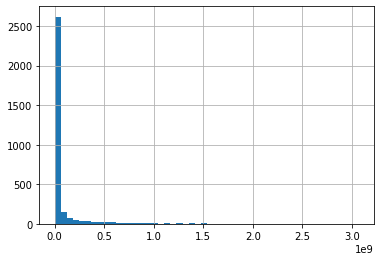

In [50]:
data['box_office'].hist(bins = 50)

Часть значений стобца 'box_office' выглядит слишком маленькой. Возможно потеряны нули или данные внесены в другой валюте. Чуть подробнее изучим фильмы с кассовыми сборами меньше 10 тыс. 

<AxesSubplot:>

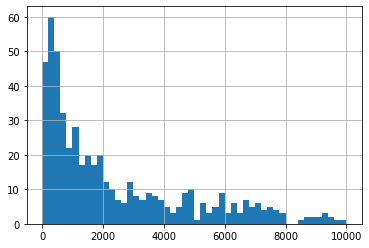

In [51]:
data['box_office'].hist(range = (1, 10000), bins = 50)

In [52]:
len(data[(data['box_office'] < 10000) & (data['box_office'] > 0)])

515

In [53]:
data[(data['box_office'] < 10000) & (data['box_office'] > 0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Unknowen,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,Unknowen,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама,комедия",360.00
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",Unknowen,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,Unknowen,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия,мелодрама,криминал",380.00
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,Unknowen,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.10,драма,"1,165.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,ШПИОН,111009411,2011-12-09 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"боевик,комедия,криминал","5,405.00"
5388,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.70,комедия,465.00
5389,Кунг-фу Панда 2.,224021411,2011-11-15 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм,фэнтези,боевик","9,270.00"
6581,Время собирать цветы,112025118,2019-01-01 12:00:00+00:00,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknowen,"7,175.00"


Часть фильмов с низкими сборами была выпущена ещё в СССР, хотя имеет дату премьеры 2010ые. Видимо столбец 'show_start_date' - это дата премьеры фильма по конкретной лицензии. Поскольку и сборы указаны для прокатного удостверения, а не для конкретного фильма, вероятно, в данных всё же нет ошибок.  
Тем не менее 9.270 руб для Кунг-фу Панды 2 всё ещё кажется неправдоподобно низкой суммой. Только если у фильма не одна лицензия.

In [54]:
data[data['title'].str.contains('Кунг-фу Панда 2', case=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5037,Кунг-фу Панда 2.,224021511,2011-11-16 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм,фэнтези,боевик",NaN
5225,Кунг-фу Панда 2,124000911,2011-04-28 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,Мелисса Кобб,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм,фэнтези,боевик","94,515.00"
5389,Кунг-фу Панда 2.,224021411,2011-11-15 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм,фэнтези,боевик","9,270.00"


Так и есть. Хотя общая сумма для этого мультфильма в предоставленных данных всё ещё кажется слишком маленькой. Вероятнее всего сборы конкретных лицензий действительно могут быть такими низкими.

<AxesSubplot:>

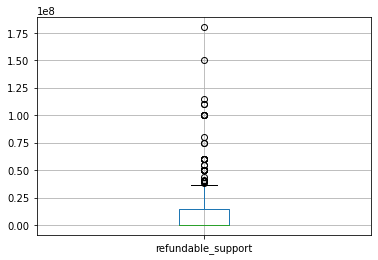

In [55]:
data.boxplot('refundable_support')  

In [56]:
len(data.loc[data['refundable_support'] > 40000000])

31

Больше половины фильмов, для которых есть информация в столбце 'refundable_support', имеют значение ноль, то есть не получали гос.поддержки в формате возвратных средств. По диаграмме размаха видно, что данные больше 40 млн. попадают за пределы нормального распределения и могут считаться статистическими выбросами. Таких значений 31, то есть около 10% от всей заполненной информаци в данном столбце

<AxesSubplot:>

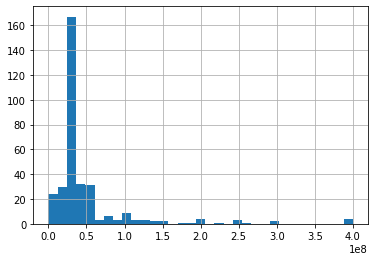

In [57]:
data['nonrefundable_support'].hist(bins = 33)

<AxesSubplot:>

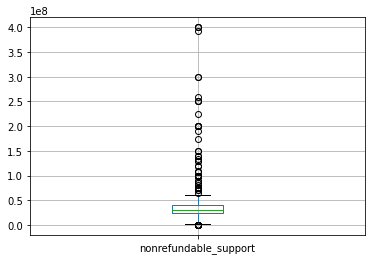

In [58]:
data.boxplot('nonrefundable_support')

По столбцу 'nonrefundable_support' аномальными значениями можно считать объём гос.поддержки чуть выше 6 млн.

<AxesSubplot:>

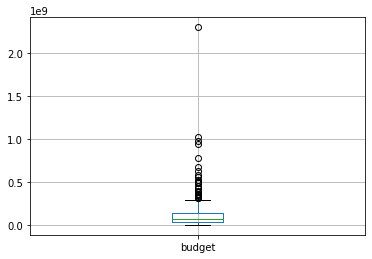

In [59]:
data.boxplot('budget')

In [60]:
len(data.loc[data['budget'] > 300000000])

28

Поскольку столбец 'budget' включает в себя данные, в том числе по гос.поддержке, очевидно, что и по нему есть статистические выбросы. По диаграмме размеха такими выбросами можно считать строки с бюджетом выше 300 млн.руб.

<AxesSubplot:>

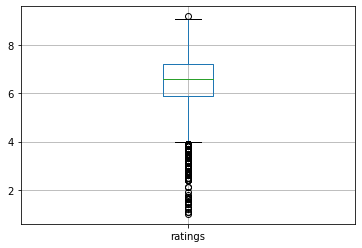

In [61]:
data.boxplot('ratings')

Для столбца 'ratings' большая часть фильмов укладывается в оценку от 4 до 9. Выбросами можно считать выходящие за эти рамки значения.

In [62]:
data[data['ratings'] > 9]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1471,Друзья друзей,111014513,2013-12-19 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.20,"комедия,мелодрама","27,780.00"
7302,Побег из Шоушенка,121029519,2019-10-18 12:00:00+00:00,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,"Лиз Глоцер, Дэвид В.Лестер, Ники Марвин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.10,драма,NaN


Стало интересно, что за фильмы получили зрительский рейтинг выше 9. "Друзья друзей" явно подхватил оценку сериала "Друзья". На Кинопоиске у фильма всё-таки оценка 3,3. Я его удалю.

In [63]:
data.drop(labels = [1471], axis = 0, inplace = True)

Столбцы refundable_support, nonrefundable_support, budget, ratings содержат аномально высокие значения, которые могут оказывать влияние на исследование. Для дальнейших расчётов следовало бы их исключить. Но так как данных и без того очень мало, оставляю датафрейм без изменений

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [64]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [65]:
def general(row):
    general = row.split(',')
    return general[0]

data['general_director'] = data['director'].apply(general)
data['genres'] = data['genres'].apply(general)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [66]:
data['support_rate'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [69]:
year_group = data.groupby(['year','title']).agg({'box_office':'max'}).reset_index().groupby('year')['title', 'box_office'].count()
year_group['ratio'] = year_group['box_office'] / year_group['title']
year_group

,title,box_office,ratio
year,,,
2010,817,102,0.12
2011,558,108,0.19
2012,556,128,0.23
2013,614,183,0.30
2014,765,277,0.36
2015,688,463,0.67
2016,782,522,0.67
2017,505,357,0.71
2018,884,475,0.54


Text(0, 0.5, 'Доля')

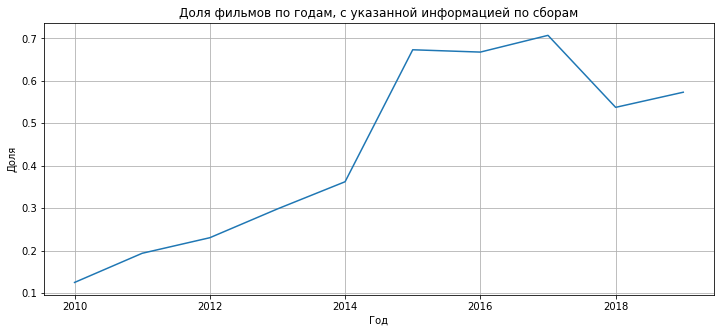

In [70]:
year_group['ratio'].plot(grid=True, figsize=(12, 5))
plt.title('Доля фильмов по годам, с указанной информацией по сборам')
plt.xlabel('Год')
plt.ylabel('Доля')

Наибольшая доля фильмов, с указанной информацией о прокате в кинотеатрах в 2015-2017 годах.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Text(0, 0.5, 'Сборы(млрд.руб.)')

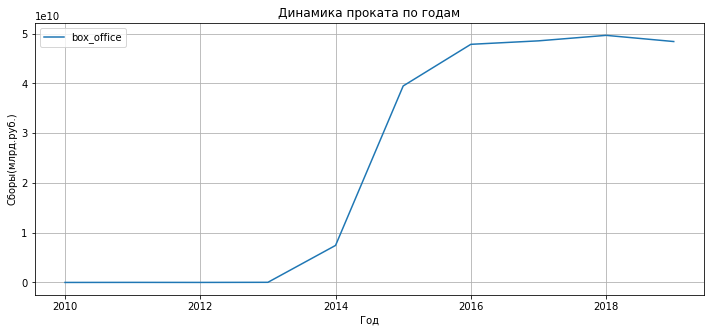

In [71]:
data.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum').plot(grid=True, figsize=(12, 5))
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Сборы(млрд.руб.)')

Минимальная сумма сборов в 2010 году. Начиная с 2013 года сборы растут, а с 2016 выходят на плато. Наибольшая сумма зафиксирована в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [72]:
data.pivot_table(index = 'year', values = 'box_office', aggfunc = ('mean', 'median'))

,mean,median
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"162,688.12","3,500.00"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


С точки зрения прибыли с одного фильма - успешнее всё-таки 2017 год.  
На медианные значения прокатных сборов в меньшей степени влияют сборы самых успешных (или наименее успешных) проектов. Из данных не были удалены статистические выбросы, поэтому их влияние отражается в большой разнице между медианой и ср.значением.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [73]:
data.query('year >= 2015').pivot_table(index = 'age_restriction', columns = 'year', values = 'box_office', aggfunc = 'sum', margins = True)

year,2015,2016,2017,2018,2019,All
age_restriction,,,,,,
«0+» - для любой зрительской аудитории,"379,054,578.37","150,228,848.67","229,598,930.00","32,449,002.11","17,746,066.82","809,077,425.97"
«12+» - для детей старше 12 лет,"13,616,082,008.91","12,204,446,524.39","7,851,427,660.67","14,267,291,660.69","12,680,198,773.67","60,619,446,628.33"
«16+» - для детей старше 16 лет,"11,368,120,870.27","16,664,548,541.74","18,745,042,900.06","16,503,602,346.96","12,753,418,984.60","76,034,733,643.63"
«18+» - запрещено для детей,"5,432,308,367.44","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64","40,759,615,572.12"
«6+» - для детей старше 6 лет,"8,701,799,371.41","12,053,146,008.24","12,086,142,145.76","10,104,974,623.41","12,852,548,650.86","55,798,610,799.68"
All,"39,497,365,196.40","47,866,299,741.91","48,563,707,217.51","49,668,403,134.32","48,425,708,779.59","234,021,484,069.73"


Text(0, 0.5, 'ВК')

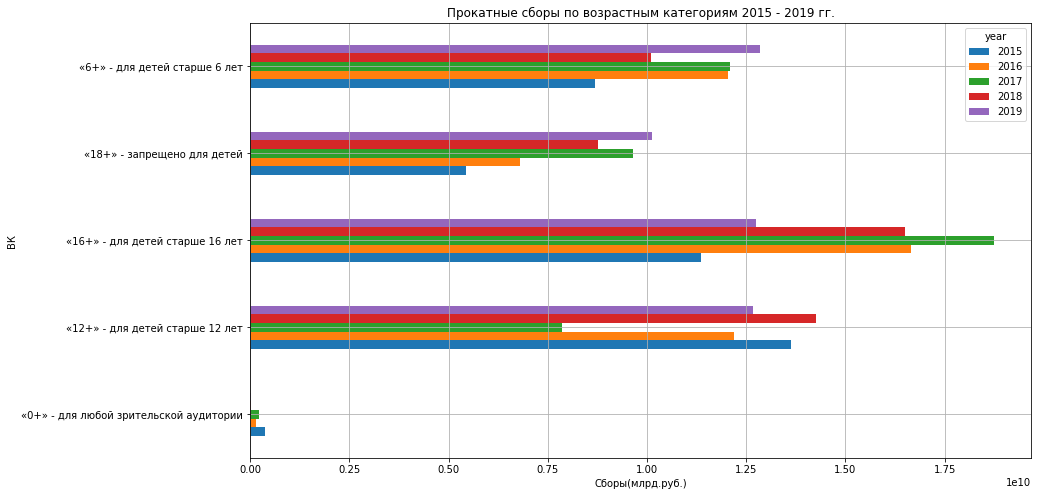

In [74]:
(
data.query('year >= 2015')
    .pivot_table(index = 'age_restriction', columns = 'year', values = 'box_office', aggfunc = 'sum')
    .plot(kind = 'barh', grid = True, figsize = (14, 8))
)
plt.title('Прокатные сборы по возрастным категориям 2015 - 2019 гг.')
plt.xlabel('Сборы(млрд.руб.)')
plt.ylabel('ВК')

In [77]:
data.query('year >= 2015').pivot_table(index = 'age_restriction', columns = 'year', values = 'box_office', aggfunc = 'median')

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"2,943,318.70","2,571,294.10","22,178,956.00","3,616,937.28","3,885,434.50"
«12+» - для детей старше 12 лет,"15,351,562.50","4,690,635.25","9,010,548.00","8,931,965.66","3,405,545.76"
«16+» - для детей старше 16 лет,"4,676,819.40","5,133,021.74","9,702,077.00","9,010,638.62","3,210,717.81"
«18+» - запрещено для детей,"4,616,614.70","6,107,001.74","8,212,677.00","7,179,466.00","5,603,216.55"
«6+» - для детей старше 6 лет,"20,380,982.20","3,026,256.15","51,992,103.00","14,688,850.32","12,875,350.34"


В период с 2015 по 2019 год наибольшая сумма сборов у фильмов с возрастным ограничением 16+.  
Тем не менее, такие фильмы не каждый год становились лидерми проката.  
В 2015 первенство было за ВК 12+, а в 2019 категории от 6+ и выше практически сравнялись по сборам. 

А вот согласно медианным значениям, лидер 6+. Практически для всех категорий. Худшие показатели у 0+, за исключением 2017 года с аномально высоким показателем медианы. Тем не менее только эта категория показывает небольшой, но рост, за последние 2 года.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выделю фильмы, получившие гос.поддержку, в отдельный датафрейм.

In [78]:
national_support = data.loc[(data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)]

In [79]:
national_support['support'] = data['refundable_support'] + data['nonrefundable_support']

Считаю пропуски по столбцу сборов. Удаляю из датасета.

In [80]:
national_support['box_office'].isna().sum()

14

In [81]:
national_support = national_support.dropna(subset = ['box_office'])

In [82]:
national_support.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,year,support_rate,support
count,318.00,318.00,318.00,301.00,318.00,318.00,318.00,318.00
mean,"11,946,540.88","48,780,403.50","132,006,722.08",6.00,"132,432,420.05","2,016.65",0.54,"60,726,944.38"
std,"24,817,662.19","57,792,390.58","184,957,591.55",1.13,"334,837,856.99",1.62,0.20,"69,705,239.66"
min,0.00,0.00,"6,000,000.00",1.00,"1,550.00","2,013.00",0.04,"4,700,000.00"
25%,0.00,"25,000,000.00","46,153,856.25",5.30,"1,236,675.50","2,015.00",0.38,"26,000,000.00"
50%,0.00,"30,000,000.00","74,955,000.00",6.20,"15,720,067.71","2,016.00",0.61,"35,000,000.00"
75%,"15,000,000.00","44,125,000.00","150,006,429.75",6.70,"106,373,008.27","2,018.00",0.66,"60,000,000.00"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",8.50,"3,073,568,690.79","2,019.00",1.00,"500,000,000.00"


В выборку попало всего 318 фильма. Посмотрим, какая часть окупилась прокатом

In [83]:
len(national_support.query('box_office > budget')) / len(national_support)

0.24842767295597484

In [84]:
national_support['repaid'] = national_support['box_office'] > national_support['budget']

Только каждый 4ый фильм, в котором поучавствовало государство, окупается.  
Посчитаем, сколько денег затрачено и сколько получено.

In [85]:
national_support['support'].sum()

19311168312.0

In [86]:
national_support['box_office'].sum()

42113509574.78

Рассмотрим объём сборов и гос.поддержки по годам.

Text(0, 0.5, 'Сборы(млрд.руб.)')

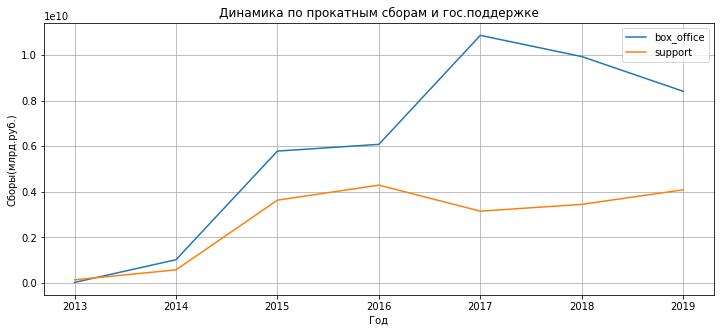

In [87]:
national_support.pivot_table(index = 'year', values = ['box_office', 'support'], aggfunc = 'sum').plot(grid=True, figsize=(12, 5))
plt.title('Динамика по прокатным сборам и гос.поддержке')
plt.xlabel('Год')
plt.ylabel('Сборы(млрд.руб.)')

В 2013 году объём потраченных государством денег превысил сборы.  
Лучший год, с точки зрения общего оборота, - 2017.  
Посмотрим топ 7 лучших фильмов по сборам с гос.поддержкой.

In [88]:
national_support.sort_values(by = 'box_office', ascending = False).head(7)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,general_director,support_rate,support,repaid
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00",...,"160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",2019,К.Шипенко,0.38,"60,000,000.00",True
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,"590,192,191.00",Фонд кино,7.50,спорт,"2,779,686,144.00",2017,А.Мегердичев,0.68,"400,000,000.00",True
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00",...,"563,784,717.00",Фонд кино,6.50,драма,"2,271,754,004.52",2018,А.Сидоров,0.32,"180,000,000.00",True
5505,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,"50,000,000.00",...,"352,477,575.00",Фонд кино,6.80,комедия,"1,655,037,688.00",2017,Д.Дьяченко,0.28,"100,000,000.00",True
5708,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,"25,000,000.00",...,"148,585,222.00",Фонд кино,NaN,Unknowen,"1,445,731,797.89",2018,О.Трофим,0.57,"85,000,000.00",True
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00",...,"635,283,867.00",Фонд кино,7.60,драма,"1,402,255,390.00",2016,Н.Лебедев,0.70,"442,104,482.00",True
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,...,"250,000,000.00",Фонд кино,5.60,фантастика,"1,038,321,489.00",2016,Ф.Бондарчук,1.00,"250,000,000.00",True


Самые кассовые фильмы вышли в 2016-2019 годах

In [89]:
national_support.query('box_office > 1000000000')['box_office'].sum() / national_support['box_office'].sum()

0.3245123795710487

Около 30% общих сборов обеспечили всего 7 картин.
Посмотрим, какой тип фильмов принёс наибольшую прибыль

In [90]:
national_support.groupby(['type']).agg({'box_office':['sum', 'count']})

box_office      
                             sum count
type                                  
Анимационный    5,623,293,149.06    30
Художественный 36,490,216,425.72   288

Судя по результатам, НаучПоп и документальное кино за государственные деньги не снимается.  
Посмотрим, на фильмы каких жанров, выделяется больше всего денег.

In [91]:
national_support.pivot_table(index = 'genres', values = 'support', aggfunc = 'sum').sort_values(by = 'support', ascending = False).head(10)

,support
genres,
драма,"5,139,406,632.00"
комедия,"3,118,282,945.00"
мультфильм,"2,450,000,000.00"
фэнтези,"1,032,900,000.00"
история,"1,020,000,000.00"
фантастика,"906,000,000.00"
триллер,"769,645,285.00"
приключения,"661,000,000.00"
Unknowen,"658,969,465.00"


Больше всего денег было выделено на драмы, так же в топе комедии и мультфильмы.  
Посмотрим топ жанров, принёсших наибольшую прибыль для фильмов с гос. поддержкой и для общего проката.

In [92]:
national_support.pivot_table(index = 'genres', values=['box_office', 'title', 'repaid'], aggfunc = {'box_office':'sum', 'title':'nunique', 'repaid':'sum'}).sort_values(by = 'box_office', ascending = False).head(10)

,box_office,repaid,title
genres,,,
комедия,"12,479,977,454.33",31,73
драма,"9,490,844,101.04",14,87
мультфильм,"5,622,014,134.66",12,30
спорт,"2,967,768,387.44",2,3
фантастика,"1,718,204,279.39",2,10
Unknowen,"1,481,748,724.64",1,15
история,"1,455,468,234.57",1,4
приключения,"1,205,596,976.62",1,6
военный,"1,017,670,471.80",3,9


In [93]:
data.pivot_table(index = 'genres', values=['box_office', 'title'], aggfunc = {'box_office':'sum', 'title':'nunique'}).sort_values(by = 'box_office', ascending = False).head(10)

,box_office,title
genres,,
фантастика,"50,986,431,810.00",356
мультфильм,"36,959,939,316.08",472
боевик,"27,598,666,334.18",518
фэнтези,"26,508,737,382.60",277
комедия,"24,476,415,574.63",642
драма,"19,129,869,724.28",1548
ужасы,"16,624,149,924.51",505
Unknowen,"8,977,870,561.48",966
триллер,"7,697,875,038.03",470


С участием гос.поддержки снимают больше всего драм, комедий и мультфильмов. Логично, что по этим жанрам и больший прокатный сбор. На эти же категории было потрачено больше всего государственных денег.  
  
Тем не менее, по общему прокату самые большие кассовые сборы у жанров: фантастика, мультфильмы, боевики и фэнтези.  
Фантастика и фэнтези тоже снимаются на государственные деньги, но по сборам не так успешны, а то и убыточны.

Text(0, 0.5, 'Жанры')

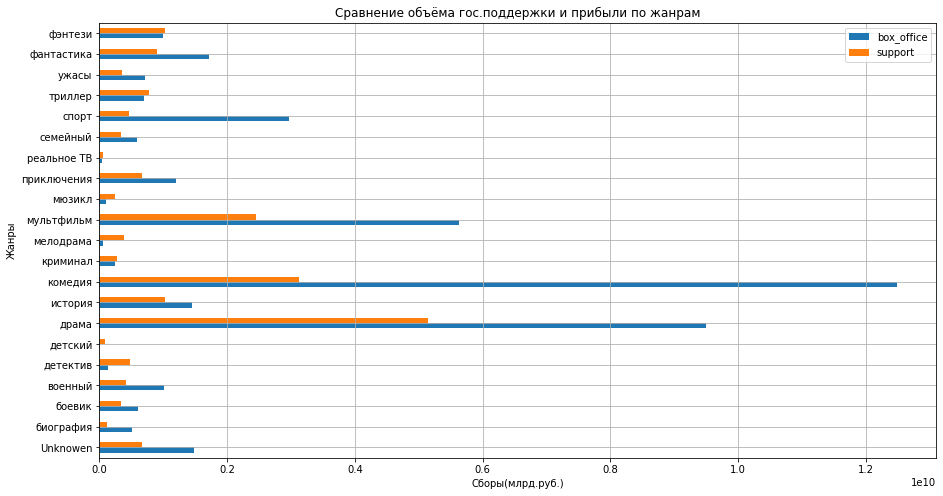

In [94]:
(
national_support.pivot_table(index = 'genres', values=['box_office', 'support'], aggfunc = 'sum')
    .plot(grid=True, kind = 'barh', figsize=(15, 8))
)
plt.title('Сравнение объёма гос.поддержки и прибыли по жанрам')
plt.xlabel('Сборы(млрд.руб.)')
plt.ylabel('Жанры')

Жанры, где затраты превышают прибыль: детективы, детские фильмы, криминал, мелодрамы, мюзиклы, триллеры и фэнтези.  
Рассмотрим топ жанров, получившиx наивысшую оценку на Кинопоиске.

In [95]:
(
national_support.query('genres != "Unknowen"')
    .pivot_table(index = 'genres', values = ('title','ratings'), aggfunc = {'title':'count','ratings':'mean'})
    .sort_values(by = 'title', ascending = False).head(7).sort_values(by = 'ratings', ascending = False)
)

,ratings,title
genres,,
драма,6.44,87
фэнтези,6.09,11
мелодрама,6.01,14
мультфильм,5.76,30
триллер,5.71,15
комедия,5.53,73
ужасы,5.20,10


In [96]:
(
data.query('genres != "Unknowen"')
    .pivot_table(index = 'genres', values = ('title','ratings'), aggfunc = {'title':'nunique','ratings':'mean'})
    .sort_values(by = 'title', ascending = False).head(7).sort_values(by = 'ratings', ascending = False)
)

,ratings,title
genres,,
драма,6.76,1548
фантастика,6.61,356
триллер,6.58,470
боевик,6.51,518
мультфильм,6.27,472
комедия,5.98,642
ужасы,5.64,505


In [97]:
national_support['ratings'].mean()

5.999335548172757

In [98]:
data['ratings'].mean()

6.478380878951427

Среди самых популярных жанров с участием гос.поддержки лучшая оценка у драм и фэнтази.  
По общему прокату драмы также остаются на первом месте по оценке зрителей Кинопоиска. Второе место за фантастикой.  
Интересно, что средняя оценка фильмов с гос.поддержкой всего 5.9 против 6.5 по общему прокату.

In [99]:
national_support.pivot_table(index = 'general_director', values=['box_office', 'title', 'repaid'], aggfunc = {'box_office':'sum', 'title':'count', 'repaid':'sum'}).sort_values(by = 'box_office', ascending = False).head(10)

,box_office,repaid,title
general_director,,,
К.Шипенко,"3,827,772,217.79",2,3
А.Мегердичев,"2,779,686,144.00",1,1
Д.Дьяченко,"2,404,898,634.12",4,4
А.Сидоров,"2,271,754,004.52",1,1
О.Трофим,"1,445,731,797.89",1,1
Д.Шмидт,"1,412,475,637.00",2,3
Н.Лебедев,"1,402,255,390.00",1,1
Д.Киселев,"1,399,783,312.00",2,2
Ф.Бондарчук,"1,038,321,489.00",1,1


Взглянем на список режиссёров, получивших наибольшую гос.поддержку

In [100]:
national_support.pivot_table(index = 'general_director', values=['support', 'title', 'repaid'], aggfunc = {'support':'sum', 'title':'count', 'repaid':'sum'}).sort_values(by = 'support', ascending = False).head(10)

,repaid,support,title
general_director,,,
Н.Хомерики,1,"660,000,000.00",3
А.Кравчук,0,"500,000,000.00",1
Р.Давлетьяров,1,"459,847,945.00",5
А.Мизгирев,0,"450,000,000.00",1
Н.Лебедев,1,"442,104,482.00",1
А.Мегердичев,1,"400,000,000.00",1
Д.Дьяченко,4,"351,000,000.00",4
А.Цицилин,1,"350,000,000.00",3
И.Шурховецкий,1,"350,000,000.00",1


Посмотрим на прибыльность фильмов с точки зрения возрастной категории

In [101]:
national_support.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['sum','median'])

,sum,median
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,"552,932,752.50","32,244,810.00"
«12+» - для детей старше 12 лет,"19,957,963,755.94","23,365,689.49"
«16+» - для детей старше 16 лет,"7,658,462,636.93","8,195,307.25"
«18+» - запрещено для детей,"560,158,730.15","1,828,557.75"
«6+» - для детей старше 6 лет,"13,383,991,699.26","66,504,721.61"


В отличие от общего проката, для фильмов с гос.поддержкой бОльший оборот у "семейного" кино, которое можно посмотреть с детьми 6+ и 12+. По среднему значению к лидерам присоединяется ВК 0+.  
Проверим, есть ли зависимость между увеличением доли гос.поддержки и прокатным сбором.

In [102]:
national_support['support_rate'].corr(national_support['box_office'])

-0.08459142189398026

Text(0, 0.5, 'Сборы(млрд.руб.)')

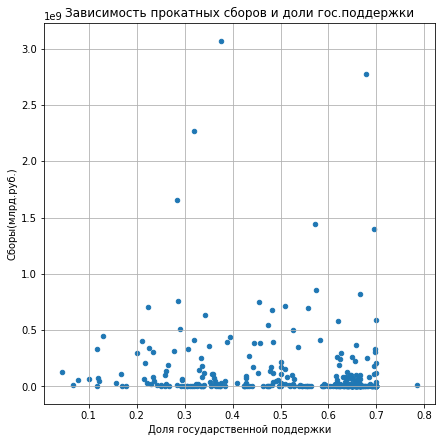

In [103]:
national_support.query('support_rate != 1').plot(x = 'support_rate', y = 'box_office', kind = 'scatter', grid = True, figsize = (7, 7))
plt.title('Зависимость прокатных сборов и доли гос.поддержки')
plt.xlabel('Доля государственной поддержки')
plt.ylabel('Сборы(млрд.руб.)')

На мой взгляд, взаимосвязь слабая, или вообще отсутствует. Из гистограммы исключены значения фильмов, по которым бюджет рассчитан из суммы значений гос.поддержки.  
Рассмотрим источникам финансирования: откуда поступает больше средств, из каких источников поступает больше невозвратных средств

In [104]:
national_support.pivot_table(index = 'financing_source', values = ['support' , 'nonrefundable_support'], aggfunc = 'sum')

,nonrefundable_support,support
financing_source,,
Министерство культуры,"4,547,141,000.00","4,547,141,000.00"
"Министерство культуры, Фонд кино","859,931,354.00","1,185,431,354.00"
Фонд кино,"10,105,095,958.00","13,578,595,958.00"


In [105]:
national_support['budget'].corr(national_support['ratings'])

0.11474909760794486

Text(0, 0.5, 'Бюджет')

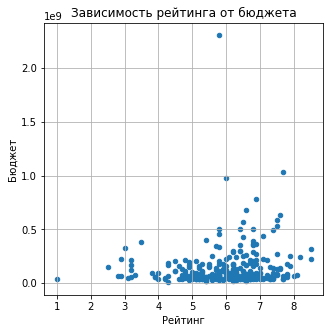

In [106]:
national_support.plot(x = 'ratings', y = 'budget', kind = 'scatter', grid = True, figsize = (5, 5))
plt.title('Зависимость рейтинга от бюджета')
plt.xlabel('Рейтинг')
plt.ylabel('Бюджет')

Для фильмов с оценкой выше 5 по графику можно увидеть смещение в сторону увеличения бюджета. По представленным данным, можно сделать вывод, что взаимосвязь по этим параметрам есть. И в части случаев, с увеличением бюджета, растёт зрительская оценка.

### Шаг 5. Напишите общий вывод

Текущее иследование проведено на основании открытых данных с портала Минестерства культуры, а также информации о зрительском рейтенге с сайта КиноПоиск.  
При обработке данных удалено мене 1% значений, часть пропущенных значений заполнено отбивкой 'unknowen'. Основна яасть пропусков оставлена без изменений. 
Также в ходе предобработки данных выявлена проблема, усложняющая исследование: отсутствие единых правил внесения имён, наименований, а также нескольких значений, для столбцов title, type, film_studio, production_country, director, producer, ratings и genres. Рекомендуется создать единый шаблон, возможн использовать всплывающие подсказки, при заполнении полей.  


В проведённом исследовании проанализированы: 
Динамика количества вышедших фильмов, кассовым сборам по годам.
Влияние возрастной категории на сборы.

Отдельно проанализированы фильмы, получившие гос.поддержку:
В динамике затрат и кассовых сборов по годам, жанрам и возрастным категориям.
По зрительской оценке сайта КиноПоиск.

Из представленных данных можно сделать вывод, что наиболее интересными для российского зрителя являются художественные и анимационные фильмы, снятые в жанре фантастики, мультфильмы. Нельзя исключать и боевики, фэнтези, комедии и драмы. Также жанры фантастика и драма выше оцениваются зрительским рейтингом. Наиболее прибыльными можно считать фильмы, с возрастной категорией 6+ и 12+.
  
Только 25% фильмов с гос.поддержкой окупается прокатом.  
Наибольшее кол-во картин, снятых с участием гос.средств, относится к жанрам комедии, драмы и мультфильма. Они же совокупно и приносят наибольшую прибль. А также среднюю зрительскую оценку только 5.9. В отношении возрастной категории наиболее прибыльными по общим объёмам стали фильмы 6+ и 12+. А в разрезе средней выручки за проект к ним добавляется ещё и 0+

Предлагаю обратить внимание на фильмы в жанре фантастика. На данный момент на них выделено менее 5% общего объёма государствнной поддержки. Тогда как по общим данном, за период с 2010 по 2019, данный жанр - лидер как в общем объёме прокатных сборов, так и в зрительской оценке. Так же рекомендую не снижать затраты на фильмы для семейного просмотра с возрастным ограничением от 0+ и до 12+
 